<a href="https://colab.research.google.com/github/jonesavelino/idea-c2-tool/blob/main/IDEA_ETAPA_3_FineTuneBERT_Spacy_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETAPA 3 - RODAR NER

## Caderno resposável por extrair as NER dos textos anotados
### Passo a passo
#### 1 - Recuperar as NER anotadas nos textos pelo programa de anotação
##### 1.1 - Tags de configuração que estão no item 2.1:

train = "/content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-train-k0.spacy"

dev = "/content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-dev-k0.spacy"
#### 2 - Instanciar o modelo de IA de acordo com os hiperparâmetros.
##### 2.1 - Arquivo de configuração dos hiperparâmetros: /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg
#### 3 - Rodar o modelo de aprendizado e avaliar a precisão, a taxa de perda e a acurácia.
#### 4 - Conforme os resultados de avaliação do modelo, gerar as NER aprendidas.
##### 4.1 - Local onde o modelo é gerado: /content/drive/MyDrive/Doutorado/IDEA/NER/outputs

# Data: 18-05-2023
# Autores: Maj Giselle Farias e Jones.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip uninstall spacy -y

In [ ]:
!pip install -U spacy
#!pip install -U spacy==3.1.0

# ********************************************************************
# TEM QUE ESCOLHER BASE OU LARGE
#*********************************************************************
# para utilizar o BERT Base
!python -m spacy download pt_core_news_sm

# para utilizar o BERT Large
#!python -m spacy download pt_core_news_lg

# para utilizar o BERT em Inglês Base
#!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2024-01-01 13:27:00.390126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 13:27:00.390174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Att

In [ ]:
!pip install spacy-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.9/197.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg

2024-01-01 13:27:37.198546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 13:27:37.198594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 13:27:37.199886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 13:27:37.207198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 13:27:38.243271: W tensorflow/compiler/tf2

In [ ]:
!python -m spacy debug data /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg

2024-01-01 13:28:33.304162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 13:28:33.304213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 13:28:33.305532: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 13:28:33.312456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 13:28:34.353889: W tensorflow/compiler/tf2

In [ ]:
!python -m spacy train -g 0 /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg --output /content/drive/MyDrive/Doutorado/IDEA/NER/outputs

2024-01-01 13:29:22.595125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 13:29:22.595179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 13:29:22.596554: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 13:29:22.603780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 13:29:23.602033: W tensorflow/compiler/tf2

In [ ]:
!python -m spacy benchmark accuracy /content/drive/MyDrive/Doutorado/IDEA/NER/outputs/model-best/ /content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-test.spacy --gpu-id 0

2023-11-27 21:20:24.903602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 21:20:24.903668: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 21:20:24.903694: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 21:20:24.911169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 21:20:26.026982: W tensorflow/c

In [ ]:
!pip install spacy_langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993413 sha256=86bab345074f8864a3ce5962cd940fec98fa18209a66840569512943586f3e45
  Stored in directory: /root/.cache/pip/wheels/97/f1/e4/8b73f7a0421b132755956892d29b1e764d3e0857a6e92e32fe
Successfully built langdetect


In [ ]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !pip install spacy-transformers

#NER_MODEL_PATH="/content/drive/MyDrive/Doutorado/IDEA/NER/outputs/model-corpus-1-scierc-n-categoria-NER/model-best/"
NER_MODEL_PATH="/content/drive/MyDrive/Doutorado/IDEA/NER/outputs/model-best/"

import spacy
import pandas as pd

nlp = spacy.load(NER_MODEL_PATH)

# Teste com a passagem do texto ou textos através do arquivo
# cols1 = ['sentenca']
# text = pd.DataFrame(columns=cols1)
# text = pd.read_csv('/content/drive/MyDrive/Doutorado/IDEA/avaliar/inputs.txt', header=None, lineterminator='\n', sep=';', names=cols1, error_bad_lines=False)
# print(text)

# for doc in nlp.pipe(text.sentenca, disable=["tagger", "parser"]):
#     print([(ent.text, ent.label_) for ent in doc.ents])

# Teste com texto único
text = ['''Os elementos do poder de combate terrestre representam a essência das capacidades que a F Ter emprega em situações – sejam de guerra ou de não guerra. São eles: Liderança, Informações e as Funções de Combate.''']
for doc in nlp.pipe(text, disable=["tagger", "parser"]):
   print([(ent.text, ent.label_) for ent in doc.ents])


# doc = nlp("This is Berlinstrasse, which is also known as Berlin Street or Berlin St. That Ghetto and The Ghetto. The Warsaw Ghetto")
# from spacy import displacy
# displacy.render(doc, style="ent")




[('poder de combate', 'entity'), ('F', 'entity'), ('guerra', 'entity'), ('guerra', 'entity'), ('Liderança', 'entity'), ('Combate', 'entity')]


In [ ]:
# import spacy
# import pandas as pd

# nlp = spacy.load("/content/drive/MyDrive/Doutorado/IDEA/NER/outputs/model-best/")

# for docum, doc in enumerate(nlp.pipe(text, disable=["tagger"])):
#   print('\nTexto:', doc.text)
#   for e in doc.ents:
#       print(e.text)
#       nr_ent = recupera_entidade(dim_ents, e.text, e.label_)
#       print(f'   {e.start_char}\t{e.text} [{e.label_}]')
#       if nr_ent == -1:
#         print(e.text, "não encontrada. Inserindo...")
#         print(id_ent_cont, e.text, e.label_)
#         dim_ents.append([id_ent_cont, e.text, e.label_])
#         #fato_ents.append([id_doc, id_ent_cont, 1])
#       else:
#         print("já tinha")
#         #fato_ents.append([id_doc, nr_ent, 1])
#       ent_id_start[e.start_char] = id_ent_cont  # So posso fazer isso porque modelo nao aceita overlap
#       id_ent_cont += 1

#   print('\nTodas entidades já foram processadas...')
#   #print(ent_id_start)


Texto: sentenca

Todas entidades já foram processadas...


In [ ]:
# def recupera_entidade(list_ents, nome_ent, cat_ent):
#     # dim_ents.append([id_ent_cont, e.text, e.label_])
#     print("\tVerificando:", nome_ent, cat_ent)
#     id_encontrado = -1
#     for sublist in list_ents:
#         if sublist[1] == nome_ent and sublist[2] == cat_ent:
#             print(nome_ent, "já encontrado (id:", sublist[0], ")")
#             id_encontrado = sublist[0]
#             break
#     return id_encontrado

In [ ]:
# html = spacy.displacy.render(doc, style='ent')

# output_path = open('entidades_nomeadas.html', 'w', encoding='utf-8')

# output_path.write(html)

# output_path.close()

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


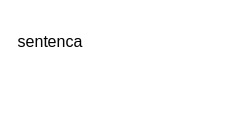

In [ ]:
# from spacy import displacy
# from IPython.display import SVG, display
# def showSVG(s):
#   display(SVG(s))

# graph01 = displacy.render(doc)
# showSVG(graph01)